In [5]:
%matplotlib inline
import numpy as np
import pyfits
import math
import matplotlib.pyplot as plt
import scipy
import scipy.spatial as ss
from scipy.stats import binned_statistic
from scipy.stats import binned_statistic_2d
from matplotlib import rc
import pickle
import os
import astropy as ap
from astropy.cosmology import WMAP7
from pylab import *
from matplotlib.path import Path
import matplotlib.patches as patches
import seaborn as sns
import sys 

#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('font',**{'family':'serif','serif':['Times'], 'size': 15})
rc('text', usetex=True)      

SMALL_SIZE = 13
MEDIUM_SIZE = 15
BIGGER_SIZE = 17

plt.rc('font', size=SMALL_SIZE) 
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)

os.chdir('/Users/nitya/Work/Data/Project1/measurements')
print(os.getcwd())

/Users/nitya/Work/Data/Project1/measurements


In [6]:
file2 = open(r'interpolated_data.pkl','rb')
d = pickle.load(file2, encoding ='latin1')
file2.close()


print(np.shape(d))
print(d.dtype.names)

(61046,)
('nsaid', 'z', 'opt', 'inf', 'mass', 'magsfr', 'magphys', 'uv', 'uvssfr', 'env')


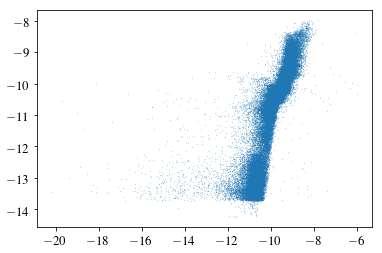

In [7]:
plt.scatter(d['uvssfr'],d['magphys'], s = 0.01)
plt.show()

/usr/local/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'lw'
  s)


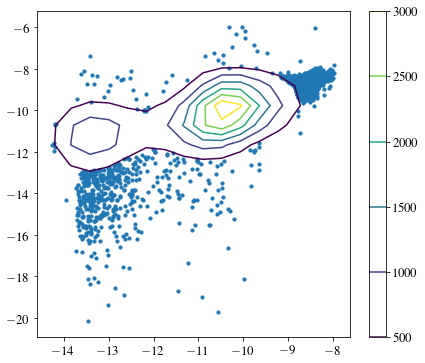

In [8]:
try:
    from astropy.convolution import Gaussian2DKernel, convolve
    astro_smooth = True
except ImportError as IE:
    astro_smooth = False

x = np.asarray(np.float64(d['magphys']))
y = np.asarray(np.float64(d['uvssfr']))

    
H, xedges, yedges = np.histogram2d(x,y, bins=(15,15))
xmesh, ymesh = np.meshgrid(xedges[:-1], yedges[:-1])

# Smooth the contours (if astropy is installed)
if astro_smooth:
    kernel = Gaussian2DKernel(stddev=1.)
    H=convolve(H,kernel)

fig,ax = plt.subplots(1, figsize=(7,6)) 
clevels = ax.contour(xmesh,ymesh,H.T, lw = 40)#,zorder=90)
#ax.clabel(clevels)

# Identify points within contours
p = clevels.collections[0].get_paths()
inside = np.full_like(x,False,dtype=bool)
for level in p:
    inside |= level.contains_points(list(zip(*(x,y))))

ax.scatter(x[~inside],y[~inside],s = 10)
plt.colorbar(clevels)
#plt.ylim(-15.0,-7.0)
plt.show(block=False)